In [1]:
import sys
sys.path.append("E:/SBI/interpretable_models/logistic regression") # This is done to import local modules like dataFolds

In [2]:
from dataFolds import *    # local module to split train and test data

In [3]:
# Train logistic regression model with the given data
# Check weights for each attribute and analyze them
# Use lime to analyze local approximations

from sklearn import linear_model
import lime.lime_tabular
from sklearn.metrics import confusion_matrix
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def trainModel(x_train, y_train, x_validate, y_validate,logObj):

    logObj.fit(x_train, y_train)
    print("Weights/coefficients : ", logObj.coef_, "\nBias/intercept : ", logObj.intercept_)
    
    prediction=logObj.predict(x_validate)
    #print(prediction)
    print("Accuracy is : ",accuracy_score(y_validate,prediction))
    
    confusionMatrix=confusion_matrix(y_validate,prediction)
    with open("cMat.txt","w") as f:
        for row in confusionMatrix:
            for ele in row:
                f.write(str(ele)+" ")
            f.write("\n")
    f.close()
    
    y_score = logObj.decision_function(x_validate)
    average_precision = average_precision_score(y_validate, y_score)
    print("Average_precision score is : ",average_precision,"\n")

    precision, recall, _ = precision_recall_curve(y_validate, y_score)
    plt.step(recall, precision, color='b', alpha=0.2,where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2,color='b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
    plt.savefig("PrecisioRecall.jpg")

    return logObj


In [9]:
path='E:/SBI/interpretable_models/logistic regression/samples.csv'
data,featureNames=readData(path)
train,test=divideData(0.65,data)
x_train, y_train, x_validate, y_validate=getTrainAndTest(train,test)
print("Training data: ", x_train.shape)
print("Testing data: ", x_validate.shape)

splitting x and y
Training data:  (5999, 3803)
Testing data:  (3231, 3803)


In [10]:
print(x_train[0].shape)
model = linear_model.LogisticRegression(max_iter=1500)

(3803,)


Weights/coefficients :  [[ 0.22700786 -0.09615074  0.         ... -0.02110536  0.
   0.        ]] 
Bias/intercept :  [-0.96496838]
Accuracy is :  0.9696688331785824
Average_precision score is :  0.6594857805550736 



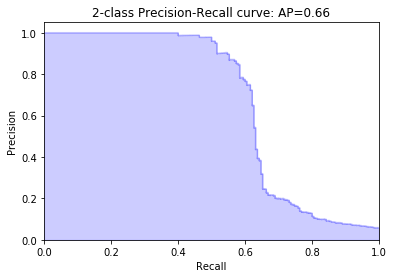

In [11]:
model = trainModel(x_train.astype(float), y_train.astype(float), x_validate.astype(float), y_validate.astype(float), model)

### Confusion matrix ###
# 3025 82 
# 18 108 

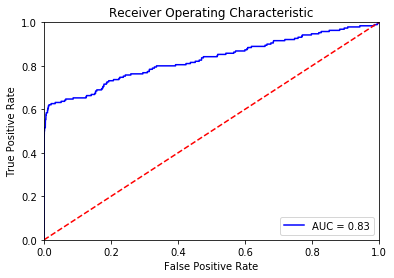

In [12]:
### Plot ROC curve 

probs = model.predict_proba(x_validate.astype(float))
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_validate, preds)
roc_auc = auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


3804
(1, 3803)
[[-1.089447343670046, 'pub12'], [-1.0253391554420266, 'pub17'], [-0.9360220356706291, 'pub686'], [-0.7798530928416955, 'MACCS90'], [-0.7779451644875167, 'OBFP4_295'], [-0.7456435911311468, 'MACCS104'], [-0.7364539974777407, 'FpDensityMorgan1'], [-0.7269228824766085, 'MACCS134'], [-0.6833462544897835, 'Morgan1972'], [-0.6679074603043755, 'Morgan1536'], [-0.6585600476795453, 'pub710'], [-0.6096157758460637, 'pub207'], [-0.6069564182576085, 'Morgan1607'], [-0.599117135910237, 'Morgan1017'], [-0.5918006276603216, 'pub685'], [-0.5732661509532896, 'Morgan1199'], [-0.5649222254013522, 'Morgan1028'], [-0.5587540002296865, 'Morgan1522'], [-0.5548606938082701, 'Morgan1066'], [-0.5518201014274918, 'SMR_VSA3'], [-0.5510912034538955, 'Morgan950'], [-0.5506446405318355, 'Morgan1089'], [-0.5302766155912573, 'pub10'], [-0.530161871060371, 'pub642'], [-0.5298415788352774, 'pub194'], [-0.5223377834868357, 'pub14'], [-0.5088859102298895, 'Morgan441'], [-0.4961482033120825, 'Morgan370'], [-

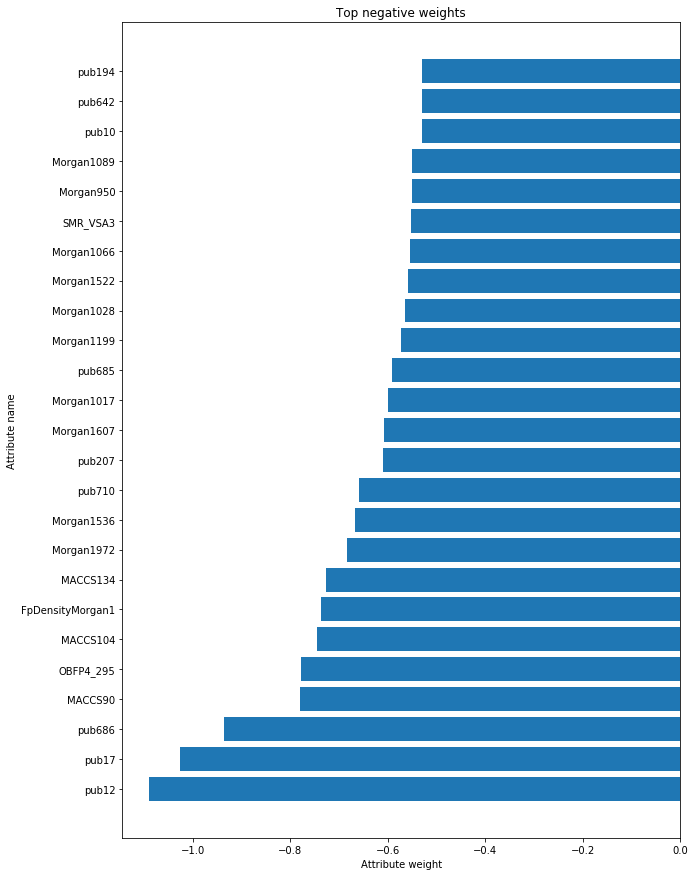

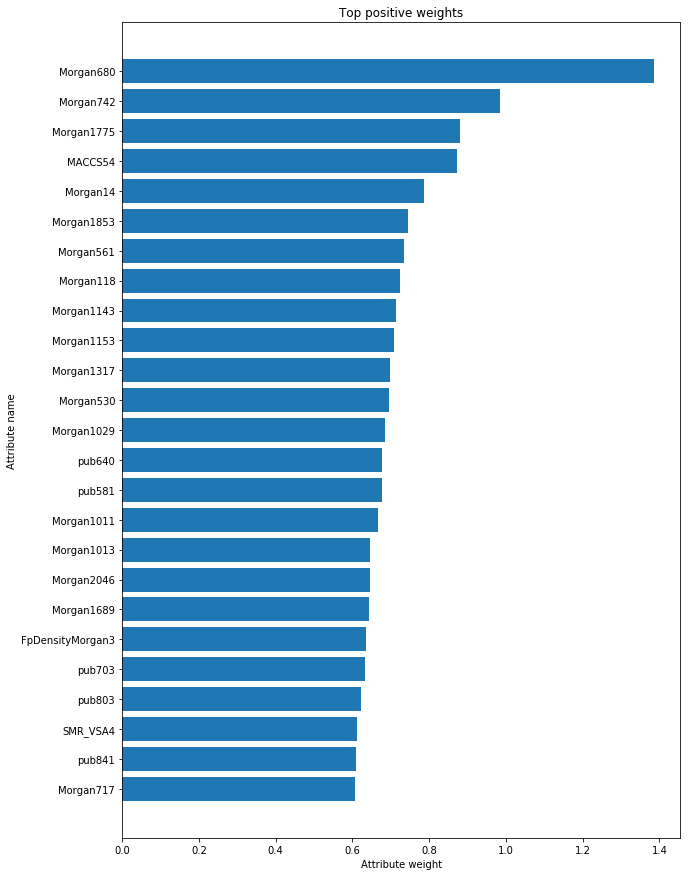

In [94]:
# Analysis of weights
print(len(featureNames))
print((model.coef_).shape)
attr_weight_list = []
for i in range(len(model.coef_[0])):
    attr_weight_list.append([model.coef_[0][i], featureNames[i]])
attr_weight_list.sort()

# Top 50 negative weights
print(attr_weight_list[:50])
_y = []
_x = []
for pair in attr_weight_list[:25]:
    _y.append(pair[1])
    _x.append(pair[0])
plt.figure(figsize=(10, 15))
plt.barh(_y, _x)
plt.ylabel("Attribute name")
plt.xlabel("Attribute weight")
plt.title("Top negative weights")
plt.savefig("Top_Negative_Attributes.jpeg")

# Top 50 positive weights
print(attr_weight_list[-50:])
_y = []
_x = []
for pair in attr_weight_list[-25:]:
    _y.append(pair[1])
    _x.append(pair[0])
plt.figure(figsize=(10, 15))
plt.barh(_y, _x)
plt.ylabel("Attribute name")
plt.xlabel("Attribute weight")
plt.title("Top positive weights")
plt.savefig("Top_Positive_Attributes.jpeg")

In [40]:
true_pos = []    # predicted 1, actal 1
true_neg = []    # predicted 0, actual 0
false_pos = []   # predicted 1, actual 0
false_neg = []   # predicted 0, actual 1
x_validate = x_validate.astype(float)
predictions = model.predict(x_validate)

# Split predictions into true+, true-, false+, false-
for i in range(len(predictions)):
    if(predictions[i] == 1 and y_validate[i] == 1):
        true_pos.append(np.array(x_validate[i]))
    if(predictions[i] == 1 and y_validate[i] == 0):
        false_pos.append(np.array(x_validate[i]))
    if(predictions[i] == 0 and y_validate[i] == 1):
        false_neg.append(np.array(x_validate[i]))
    if(predictions[i] == 0 and y_validate[i] == 0):
        true_neg.append(np.array(x_validate[i]))

print(len(true_pos), len(true_neg), len(false_pos), len(false_neg)) # Should be similar to values in confusion matrix

108 3025 16 82


[[-1.089447343670046, 'pub12'], [-0.7798530928416955, 'MACCS90'], [-0.7779451644875167, 'OBFP4_295'], [-0.7456435911311468, 'MACCS104'], [-0.6585600476795453, 'pub710'], [-0.5918006276603216, 'pub685'], [-0.5302766155912573, 'pub10'], [-0.48870497189478423, 'MACCS112'], [-0.4855866338039067, 'pub333'], [-0.4668846268754539, 'SlogP_VSA4'], [-0.40920777155179006, 'MACCS101'], [-0.36058386670246734, 'MACCS165'], [-0.3605445047974282, 'MACCS159'], [-0.3605445047974282, 'pub20'], [-0.3545159405078076, 'OBFP4_302'], [-0.35062182066082354, 'MACCS140'], [-0.35062182066082354, 'pub21'], [-0.3465373730564308, 'MACCS164'], [-0.3465373730564308, 'pub19'], [-0.3343070204045493, 'Morgan1380'], [-0.3314860592362827, 'MACCS76'], [-0.31689393367618707, 'Morgan1060'], [-0.3025197715888697, 'MACCS96'], [-0.3025197715888697, 'pub144'], [-0.29980025875177013, 'MACCS163']]
[[0.34516539706477395, 'MACCS150'], [0.34766227726973187, 'MACCS149'], [0.3503518400343048, 'MACCS116'], [0.3640686706643838, 'Morgan479

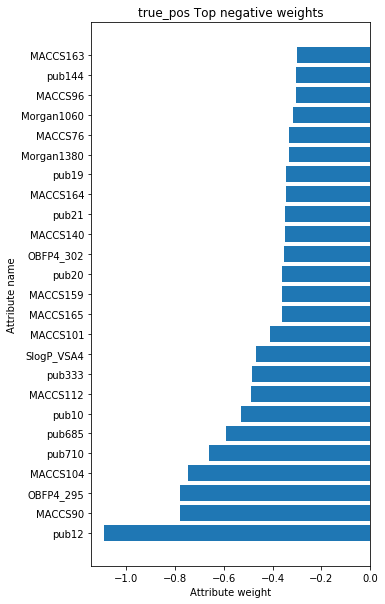

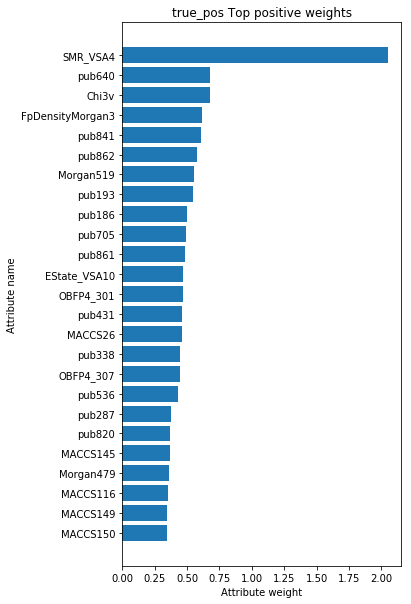

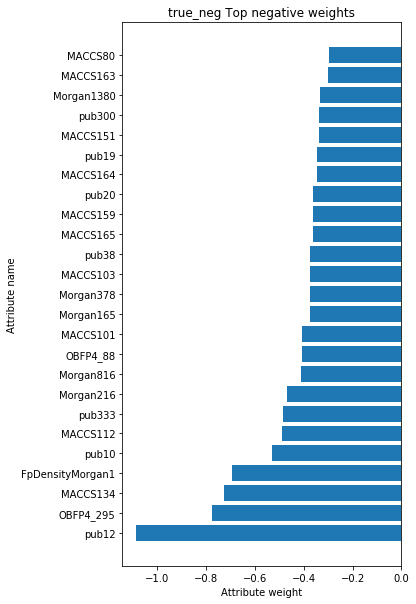

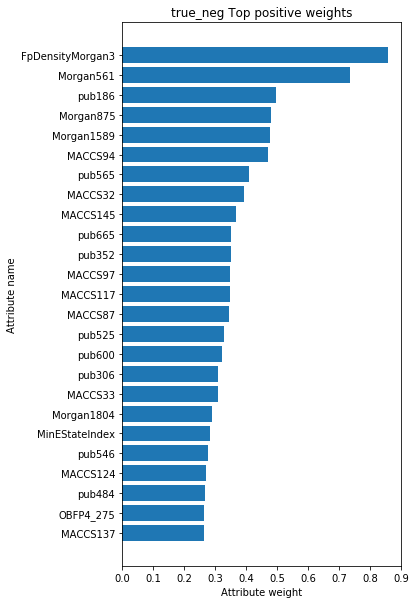

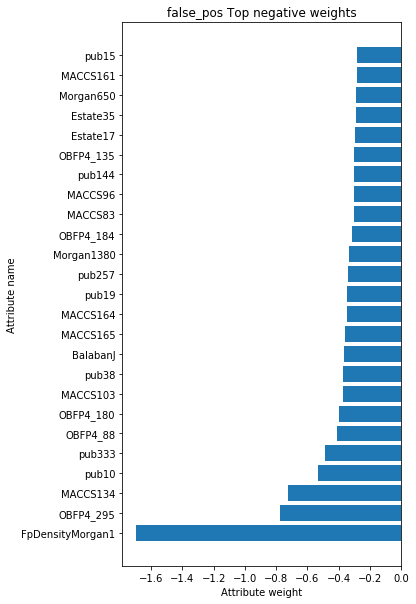

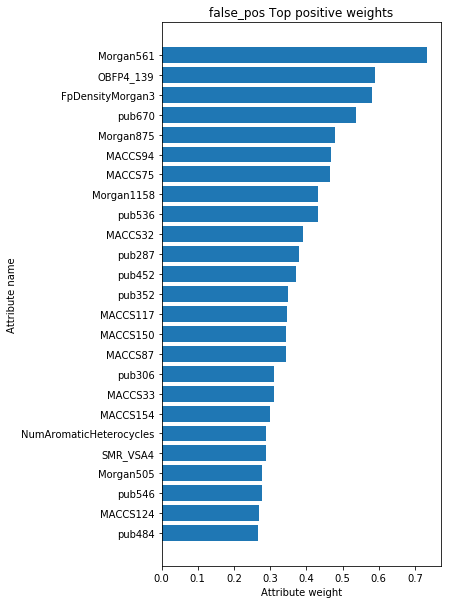

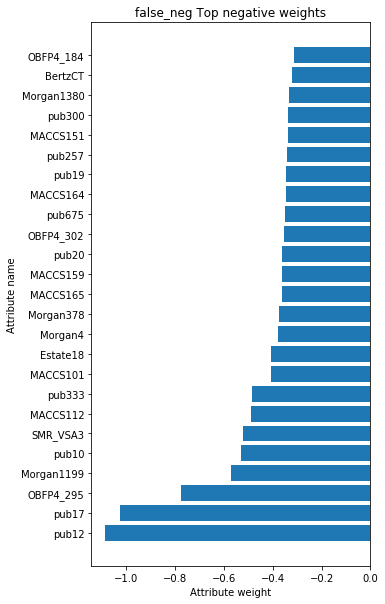

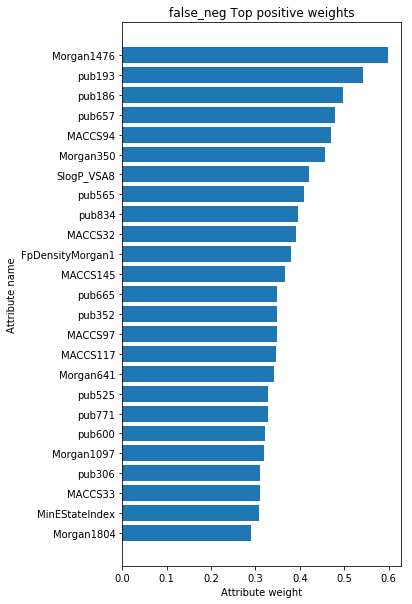

In [42]:
# Now for these 4 classes, we do two kinds of analysis
# i) "wights*attribute_values" analysis
# ii) LIME analysis


# Function to plot
def plot_instance_graphs(model, _class, _cl):
    temp = []
    for i in range(len(model.coef_[0])):
        temp.append([model.coef_[0][i]*_class[0][i], featureNames[i]])    # First true_pos row
    temp.sort()
    print(temp[:25])
    print(temp[-25:])

    _y = []
    _x = []

    for pair in temp[:25]:
        _y.append(pair[1])
        _x.append(pair[0])
    plt.figure(figsize=(5, 10))
    plt.barh(_y, _x)
    plt.ylabel("Attribute name")
    plt.xlabel("Attribute weight")
    plt.title(_cl+" Top negative weights")
    plt.savefig("Top_Negative_Attributes_"+_cl+"0.jpeg")

    _y = []
    _x = []
    for pair in temp[-25:]:
        _y.append(pair[1])
        _x.append(pair[0])
    plt.figure(figsize=(5, 10))
    plt.barh(_y, _x)
    plt.ylabel("Attribute name")
    plt.xlabel("Attribute weight")
    plt.title(_cl+" Top positive weights")
    plt.savefig("Top_Positive_Attributes_"+_cl+"0.jpeg")

plot_instance_graphs(model, true_pos, "true_pos")
plot_instance_graphs(model, true_neg, "true_neg")
plot_instance_graphs(model, false_pos, "false_pos")
plot_instance_graphs(model, false_neg, "false_neg")

[('MACCS145', 108), ('pub186', 108), ('SMR_VSA3', 107), ('pub287', 107), ('MACCS150', 106), ('FpDensityMorgan3', 105), ('pub525', 105), ('pub431', 104), ('SMR_VSA4', 103), ('pub193', 103), ('Chi3v', 102), ('MACCS116', 102), ('OBFP4_307', 102), ('Morgan519', 101), ('pub690', 101), ('pub861', 101), ('pub183', 100), ('pub600', 100), ('pub700', 100), ('MACCS154', 97), ('pub536', 93), ('Morgan1325', 92), ('pub705', 91), ('pub841', 89), ('pub862', 89), ('MACCS26', 88), ('MACCS149', 86), ('pub187', 86), ('OBFP4_301', 85), ('Estate16', 84), ('pub421', 75), ('Morgan1873', 69), ('pub338', 66), ('pub342', 65), ('Morgan1436', 63), ('Morgan314', 62), ('MACCS152', 60), ('pub463', 60), ('pub538', 60), ('Chi4v', 52), ('EState_VSA10', 49), ('MACCS123', 49), ('pub381', 49), ('pub820', 47), ('Morgan695', 46), ('MACCS143', 45), ('MACCS127', 43), ('OBFP4_289', 41), ('OBFP4_290', 41), ('pub712', 40)]
[('MACCS163', 108), ('MACCS165', 108), ('OBFP4_295', 108), ('pub10', 108), ('pub12', 108), ('pub333', 108), 

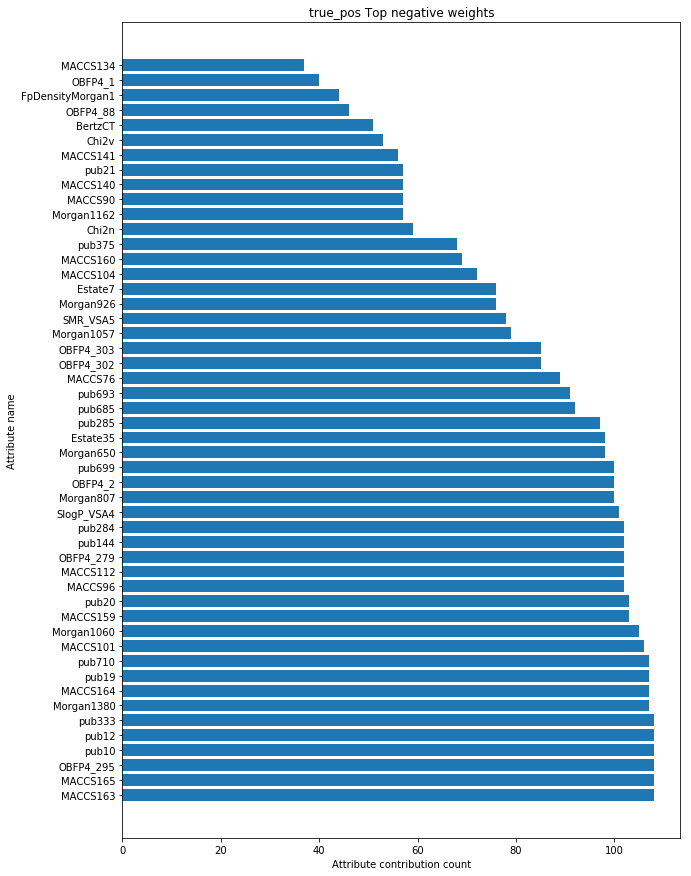

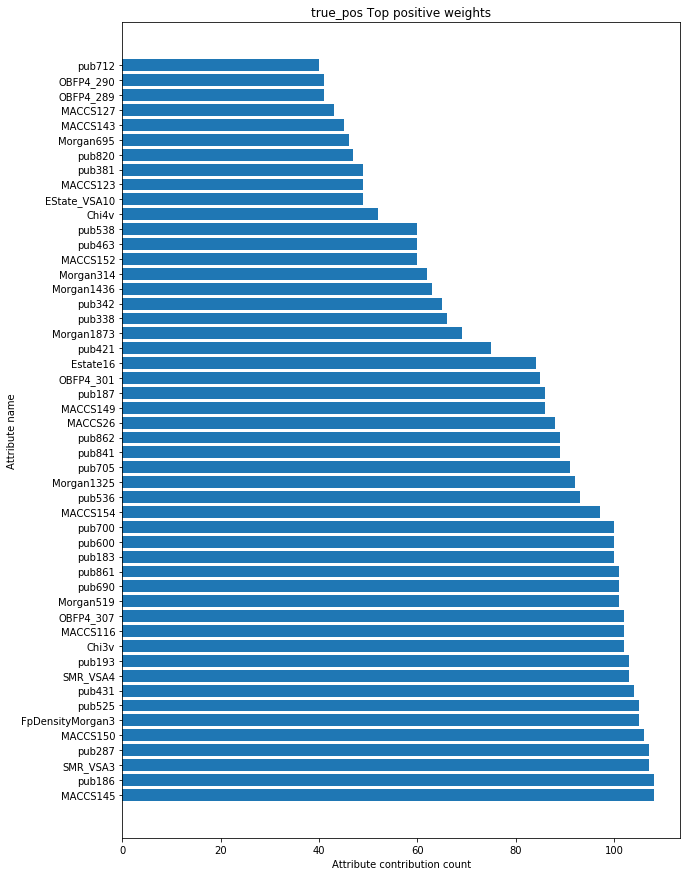

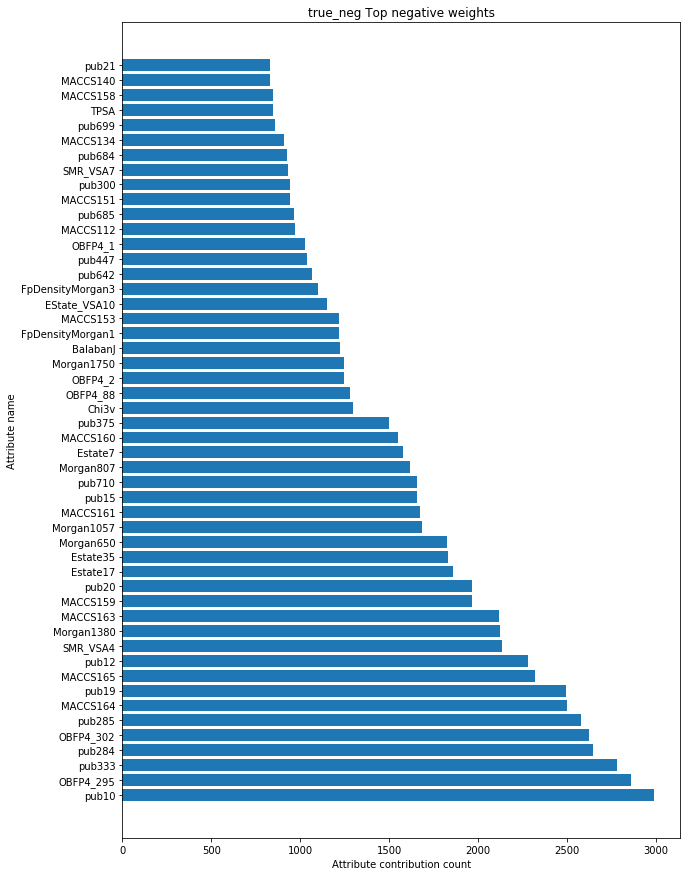

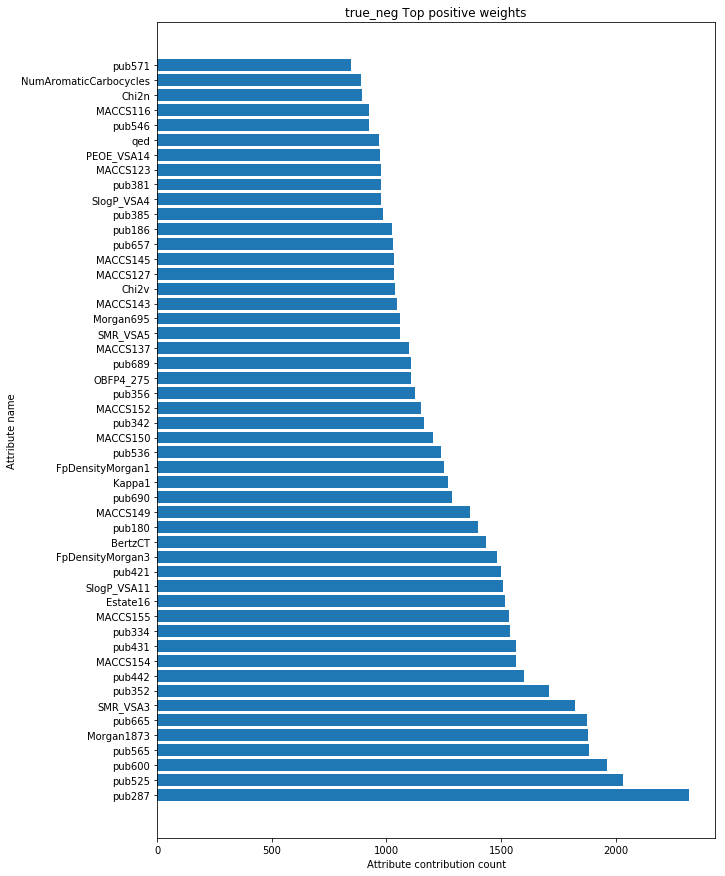

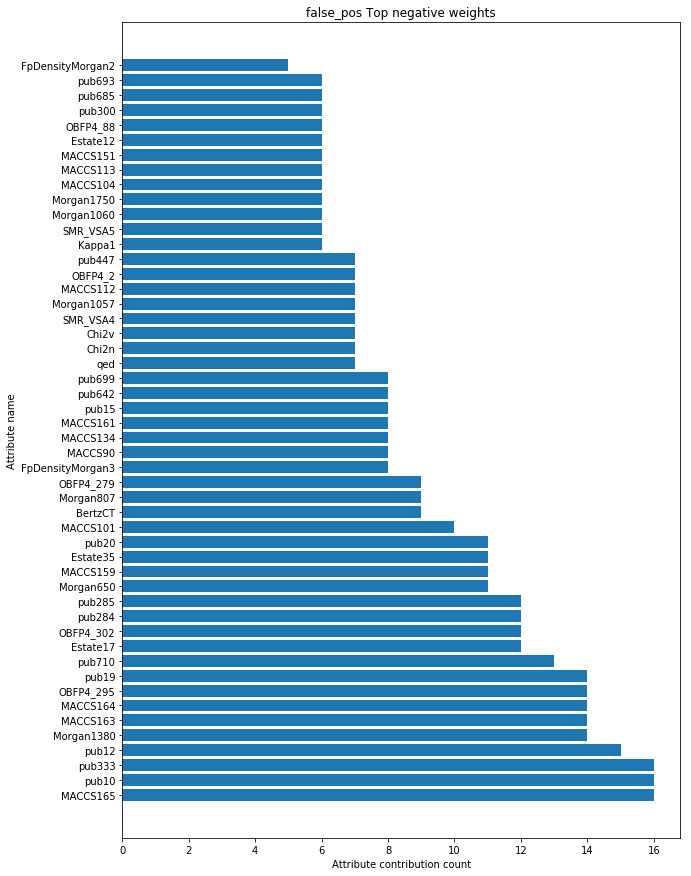

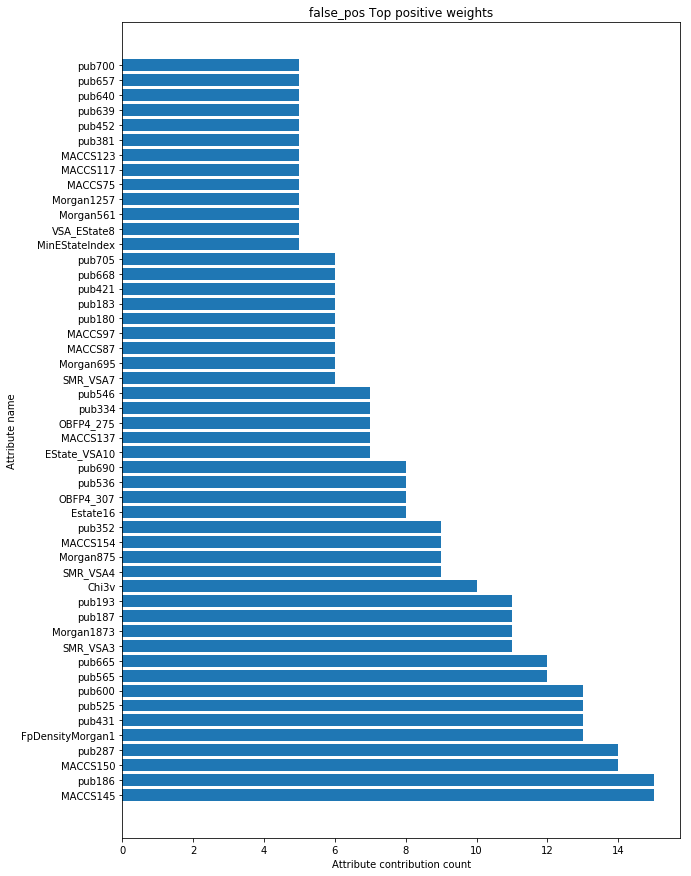

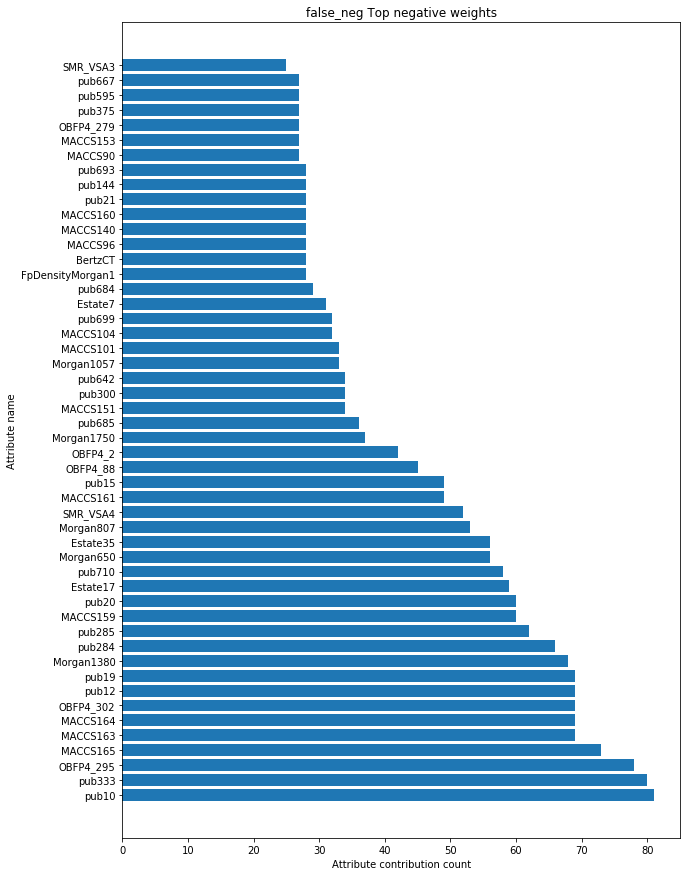

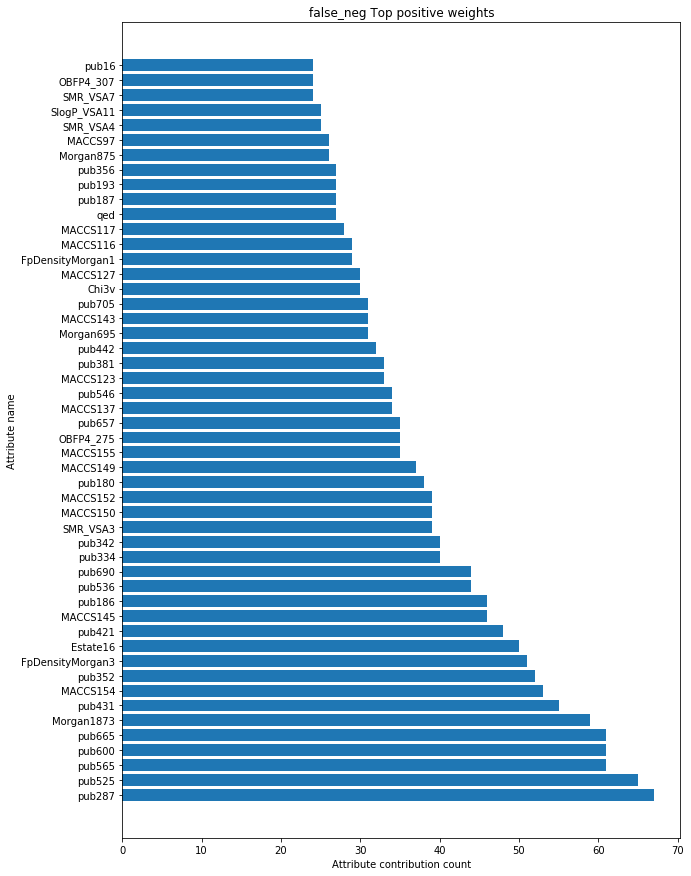

In [43]:
### Considering all the samples in each of the 4 classes and analyzing the same ### 
def plot_final_graphs(model, _class, _cl):
    temp_pos = {}
    temp_neg = {}
    for name in featureNames[:len(featureNames)-1]:
        temp_pos[name] = 0
        temp_neg[name] = 0
    for j in range(len(_class)):
        temp2 = []
        for i in range(len(model.coef_[0])):
            temp2.append([model.coef_[0][i]*_class[j][i], featureNames[i]])    # First true_pos row
        temp2.sort()
        for pair in temp2[:50]:
            temp_neg[pair[1]] += 1
        for pair in temp2[-50:]:
            temp_pos[pair[1]] += 1
    
    temp_pos = sorted(temp_pos.items(), key=lambda x:x[1], reverse=True)
    temp_neg = sorted(temp_neg.items(), key=lambda x:x[1], reverse=True)
    print(temp_pos[:50])
    print(temp_neg[:50])
    
    _y = []
    _x = []

    for pair in temp_neg[:50]:
        _y.append(pair[0])
        _x.append(pair[1])
    plt.figure(figsize=(10, 15))
    plt.barh(_y, _x)
    plt.ylabel("Attribute name")
    plt.xlabel("Attribute contribution count")
    plt.title(_cl+" Top negative weights")
    plt.savefig("Top_Negative_Attributes_"+_cl+"_Final.jpeg")

    _y = []
    _x = []
    for pair in temp_pos[:50]:
        _y.append(pair[0])
        _x.append(pair[1])
    plt.figure(figsize=(10, 15))
    plt.barh(_y, _x)
    plt.ylabel("Attribute name")
    plt.xlabel("Attribute contribution count")
    plt.title(_cl+" Top positive weights")
    plt.savefig("Top_Positive_Attributes_"+_cl+"_Final.jpeg")

plot_final_graphs(model, true_pos, "true_pos")
plot_final_graphs(model, true_neg, "true_neg")
plot_final_graphs(model, false_pos, "false_pos")
plot_final_graphs(model, false_neg, "false_neg")

In [78]:
# Now we move on to explaining with LIME
from lime import lime_tabular as lt
import pickle
with open("E:/SBI/interpretable_models/logistic regression/categorical.pickle", "rb") as f:
    cat = pickle.load(f)
#print(cat)
cat_features = list(cat.values())
#print(cat_features)
lime_obj = lt.LimeTabularExplainer(training_data=np.asarray(x_train, dtype='float64'), feature_names=featureNames, categorical_features=cat_features)
expl = lime_obj.explain_instance(true_pos[5], model.predict_proba, num_features=25, num_samples=100)
print(expl.as_list())
print(expl.as_map())
expl.show_in_notebook()

[('-0.02 < Kappa2 <= -0.02', 0.10561107849919243), ('-0.81 < MinAbsPartialCharge <= 0.08', 0.1018076524078646), ('-0.29 < NOCount <= 0.24', 0.0909731616316646), ('-0.39 < EState_VSA7 <= 0.43', 0.08576621686015942), ('SlogP_VSA12 <= -0.52', 0.08011830353149546), ('-0.20 < NHOHCount <= 0.23', 0.07921620545712867), ('PEOE_VSA14 <= -0.48', -0.07758576761603642), ('NumAliphaticCarbocycles > -0.33', 0.06919870550281854), ('-0.39 < BalabanJ <= 0.19', 0.06655013019024544), ('EState_VSA3 > 0.30', 0.06013557193673346), ('PEOE_VSA5 <= -0.37', -0.05930160112755829), ('-0.70 < EState_VSA6 <= 0.32', 0.05786056021360631), ('MolWt > 0.39', 0.05246989249576763), ('Chi3n > 0.33', 0.03920655135123149), ('NumValenceElectrons > 0.38', 0.038095960793781844), ('SlogP_VSA8 <= -0.38', -0.03501990281873906), ('-0.44 < MaxAbsPartialCharge <= -0.01', -0.030320409028627204), ('-0.23 < TPSA <= 0.28', 0.029119711784102227), ('-0.88 < EState_VSA4 <= -0.19', 0.028388993689170982), ('Chi1v > 0.43', 0.027932900667989112

C:\Users\vishw\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:154: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


In [88]:
# expl = lime_obj.explain_instance(true_pos[5], model.predict_proba, num_features=25, num_samples=100)
# print(expl.as_list())
# print(expl.as_map())
# expl.show_in_notebook()
import warnings
warnings.filterwarnings('ignore')
def lime_explainations(lime_obj,  model, _class, _cl):
    class_dict={}
    for i in range(len(featureNames)):
        class_dict[i] = 0
    for instance in _class:
        expl = lime_obj.explain_instance(instance, model.predict_proba, num_features=25, num_samples=500).as_map()
        for pair in expl[1]:
            class_dict[pair[0]] += 1
    #print(_cl + " : ", class_dict)
    class_dict = sorted(class_dict.items(), key=lambda x:x[1], reverse=True)[:25]
    _y = []
    _x = []
    for pair in class_dict:
        _y.append(featureNames[pair[0]])
        _x.append(pair[1])
    plt.figure(figsize=(5, 10))
    plt.barh(_y, _x)
    plt.ylabel("Attribute name")
    plt.xlabel("Attribute contribution count")
    plt.title(_cl+" Top positive weights")
    plt.savefig("LIME_Top_Positive_Attributes_"+_cl+"_Final.jpeg")
    return class_dict 

[(55, 11), (71, 9), (5, 8), (54, 8), (62, 6), (63, 6), (86, 6), (93, 6), (103, 6), (0, 5), (4, 5), (24, 5), (30, 5), (76, 5), (95, 5), (96, 5), (97, 5), (233, 5), (398, 5), (465, 5), (6, 4), (11, 4), (16, 4), (17, 4), (20, 4)]


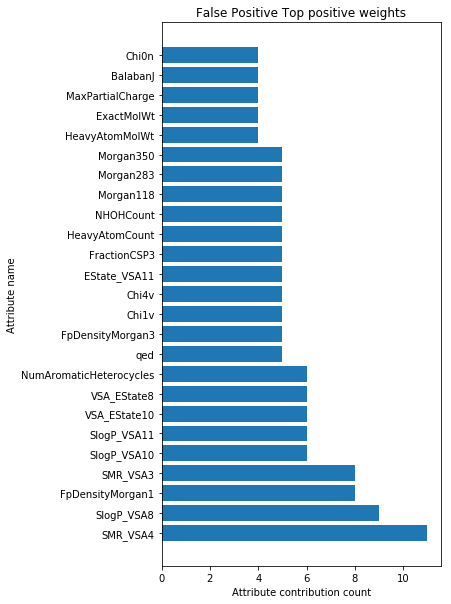

In [91]:
attr_dist=lime_explainations(lime_obj, model, np.asarray(false_pos, dtype='float64'), "False Positive")
print(attr_dist)

[(55, 54), (76, 39), (5, 37), (4, 32), (54, 30), (71, 30), (28, 23), (109, 20), (22, 19), (23, 19), (56, 19), (18, 18), (84, 18), (103, 18), (0, 17), (39, 17), (42, 17), (66, 17), (233, 17), (331, 17), (13, 16), (17, 16), (63, 16), (99, 16), (429, 16)]


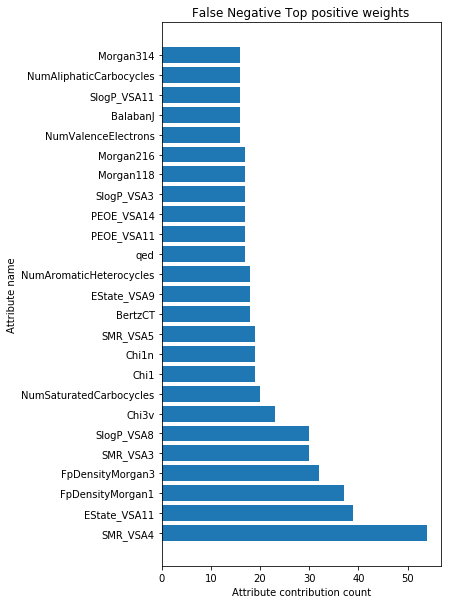

In [92]:
attr_dist2=lime_explainations(lime_obj, model, np.asarray(false_neg, dtype='float64'), "False Negative")
print(attr_dist2)